Frequent pattern mining

In [25]:
%load_ext autoreload
%autoreload 2
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import numpy as np 
from tqdm import tqdm
import time
import random
import networkx as nx
import re

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
cd D:\Course\SBRS

D:\Course\SBRS


In [12]:
file_data = 'datasets/onlineretail/online_retail.xlsx'
df = pd.read_excel(file_data)

In [54]:
df.head(10)

,transactionid,itemid,userid
0,536365,85123A,17850
1,536365,71053,17850
2,536365,84406B,17850
3,536365,84029G,17850
4,536365,84029E,17850
5,536365,22752,17850
6,536365,21730,17850
7,536366,22633,17850
8,536366,22632,17850
9,536367,84879,13047


In [14]:
df = df[['transactionid','itemid', 'userid']]
df.fillna(0, inplace=True)
df['userid'] = df['userid'].astype('int64')
df['itemid'] = df['itemid'].astype('str')
df.head()


,transactionid,itemid,userid
0,536365,85123A,17850
1,536365,71053,17850
2,536365,84406B,17850
3,536365,84029G,17850
4,536365,84029E,17850


In [15]:
list_df = []
for i in tqdm(df.transactionid.unique()):
    time.sleep(0.00000001)
    list_df.append(df[df.transactionid == i].itemid.to_list())
list_df

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25900/25900 [13:31<00:00, 31.90it/s]


[['85123A', '71053', '84406B', '84029G', '84029E', '22752', '21730'],
 ['22633', '22632'],
 ['84879',
  '22745',
  '22748',
  '22749',
  '22310',
  '84969',
  '22623',
  '22622',
  '21754',
  '21755',
  '21777',
  '48187'],
 ['22960', '22913', '22912', '22914'],
 ['21756'],
 ['22728',
  '22727',
  '22726',
  '21724',
  '21883',
  '10002',
  '21791',
  '21035',
  '22326',
  '22629',
  '22659',
  '22631',
  '22661',
  '21731',
  '22900',
  '21913',
  '22540',
  '22544',
  '22492',
  'POST'],
 ['22086'],
 ['22632', '22633'],
 ['85123A',
  '71053',
  '84406B',
  '20679',
  '37370',
  '21871',
  '21071',
  '21068',
  '82483',
  '82486',
  '82482',
  '82494L',
  '84029G',
  '84029E',
  '22752',
  '21730'],
 ['21258'],
 ['85123A',
  '71053',
  '84406B',
  '20679',
  '37370',
  '21871',
  '21071',
  '21068',
  '82483',
  '82486',
  '82482',
  '82494L',
  '84029G',
  '84029E',
  '22752',
  '21730'],
 ['22114', '21733'],
 ['22632', '22633'],
 ['22386',
  '85099C',
  '21033',
  '20723',
  '84997B

In [16]:
tr = TransactionEncoder()
tr_arr = tr.fit(list_df).transform(list_df)
df_trans = pd.DataFrame(tr_arr, columns=tr.columns_)

In [17]:
df_trans.head(100)

,10002,10080,10120,10123C,10123G,10124A,10124G,10125,10133,10134,...,M,PADS,POST,S,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
frequent_itemsets = apriori(df_trans, min_support = 0.005, use_colnames = True, low_memory=True)
frequent_itemsets

,support,itemsets
0,0.007645,(10133)
1,0.006795,(10135)
2,0.005483,(15034)
3,0.020193,(15036)
4,0.005714,(15039)
...,...,...
7533,0.006139,"(22919, 22917, 22921, 22920, 22916)"
7534,0.006216,"(22919, 22918, 22921, 22920, 22916)"
7535,0.006178,"(22919, 22917, 22918, 22921, 22920)"
7536,0.005251,"(23172, 23170, 22698, 22699, 22697, 23171)"


In [56]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.005)
rules.head(6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(15036),(20724),0.020193,0.040541,0.005058,0.250478,6.178458,0.004239,1.280095
1,(20724),(15036),0.040541,0.020193,0.005058,0.124762,6.178458,0.004239,1.119475
2,(15036),(20725),0.020193,0.062085,0.005097,0.252390,4.065238,0.003843,1.254551
3,(20725),(15036),0.062085,0.020193,0.005097,0.082090,4.065238,0.003843,1.067432
4,(21212),(15036),0.051506,0.020193,0.005174,0.100450,4.974473,0.004134,1.089219
5,(15036),(21212),0.020193,0.051506,0.005174,0.256214,4.974473,0.004134,1.275225


In [114]:
rules.iloc[9998].antecedents.issubset(('20724','22384')) # проверка наличия подмножетсва в записи

False

<>:24: DeprecationWarning: invalid escape sequence \d
<>:24: DeprecationWarning: invalid escape sequence \d
C:\Users\serge\AppData\Local\Temp\ipykernel_1936\4227823221.py:24: DeprecationWarning: invalid escape sequence \d
  if re.compile("^[R]\d+$").fullmatch(node) != None:


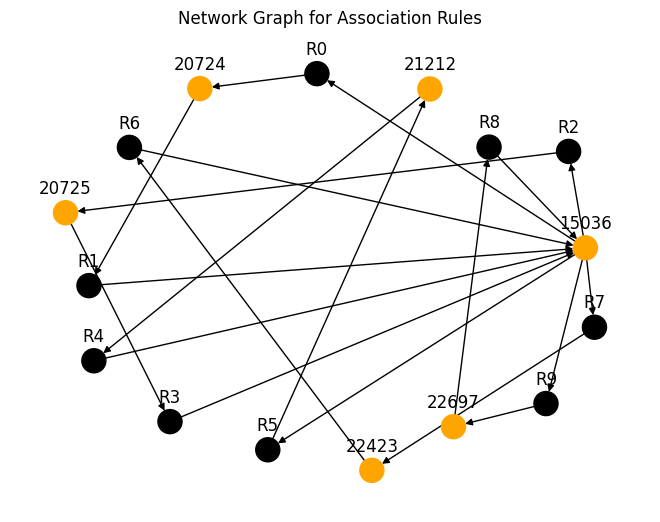

In [26]:
def draw_network(rules, rules_to_show):
  # Ориентированный граф от NetworkX
  network = nx.DiGraph()
  
  # Перебор количества правил для отображения
  for i in range(rules_to_show):
    
    # Добавление узла правила
    network.add_nodes_from(["R"+str(i)])
    for antecedents in rules.iloc[i]['antecedents']: 
        # Добавление узла-предшественника и ссылки на правило
        network.add_nodes_from([antecedents])
        network.add_edge(antecedents, "R"+str(i),  weight = 2)
      
    for consequents in rules.iloc[i]['consequents']:
        # Добавление узла-последователя и ссылки на правило
        network.add_nodes_from([consequents])
        network.add_edge("R"+str(i), consequents,  weight = 2)

  color_map=[]  
  
  # Для каждого узла, если это правило, цвет черный, в противном случае - оранжевый.
  for node in network:
       if re.compile("^[R]\d+$").fullmatch(node) != None:
            color_map.append('black')
       else:
            color_map.append('orange')
  
  # Расположение узлов с помощью spring layout
  pos = nx.spring_layout(network, k=16, scale=1)
  # Построение сетевого графа
  nx.draw(network, pos, node_color = color_map, font_size=8)            
  
  # Сдвиг расположения текста вверх
  for p in pos:  
      pos[p][1] += 0.12

  nx.draw_networkx_labels(network, pos)
  plt.title("Network Graph for Association Rules")
  plt.show()

draw_network(rules, 10)

In [126]:
test_session = list_df[random.randint(0, len(list_df))]
test_session

['22128', '22127', '22583', '22133', '22132', 'POST']

In [ ]:
score = None 


In [72]:
k = frozenset({'2021', '20201'})
tuple(list(k))

('2021', '20201')

In [125]:
# проверка наличия продукта в списке связей 
k = rules.consequents[rules.antecedents == frozenset({'15036'})].to_list()
l = '20724'
if frozenset([l]) in k:
    print(True)
else:
    print(False)

True


['15036']